In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

img (664, 1000, 3)


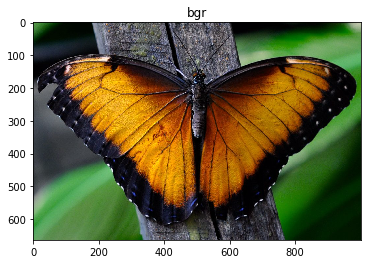

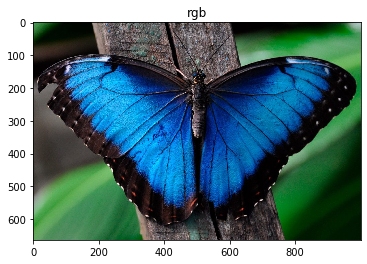

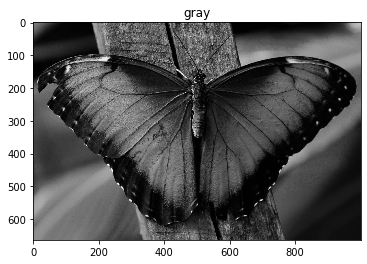

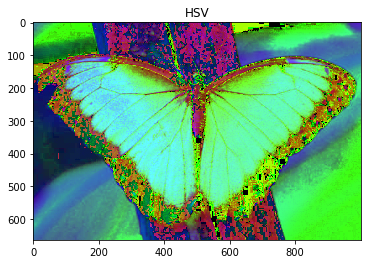

In [13]:
img = cv2.imread('mariposa.jpg')
img_bgr = img
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

print('img',img.shape)
#print(img)

plt.figure()
plt.title('bgr')
plt.imshow( img_bgr )
plt.show()

plt.figure()
plt.title('rgb')
plt.imshow( img_rgb )
plt.show()

plt.figure()
plt.title('gray')
plt.imshow( img_gray ,cmap='gray')
plt.show()

plt.figure()
plt.title('HSV')
plt.imshow( img_hsv ,cmap='gray')
plt.show()

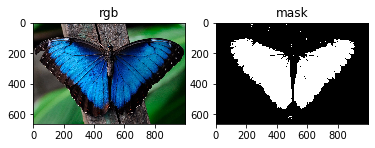

In [20]:
#Establecer los rangos donde encontramos los colores azules HSV
lower = np.array([90, 50, 50])
upper = np.array([130, 255, 255])

lower = np.array([40, 50, 50])
upper = np.array([70, 255, 255])
#Encontrar los pixeles de la imagen azules
mask = cv2.inRange(img_hsv, lower, upper)

plt.figure()
plt.subplot(1,2,1)
plt.title('rgb')
plt.imshow( img_rgb )
plt.subplot(1,2,2)
plt.title('mask')
plt.imshow( mask,cmap='gray' )
plt.show()


img_hsv (664, 1000, 3)
Ximg_hsv (664000, 3)


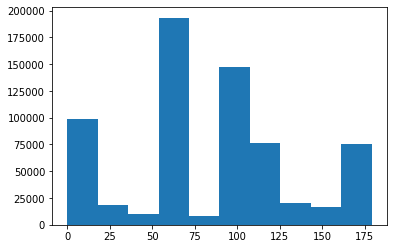

[0.15 0.03 0.02 0.29 0.01 0.22 0.11 0.03 0.03 0.11]


In [30]:
print('img_hsv',img_hsv.shape)
nrows, ncols, nch = img_hsv.shape

# Vectorizar la imagen
Ximg_hsv = np.reshape( img_hsv, (nrows*ncols,3) )
print('Ximg_hsv',Ximg_hsv.shape)

# Hue | Value | Saturation
# 24  |  92   |  156
# 100 |  234  |  234

# Obtener hue
hue = Ximg_hsv[:,0]
plt.figure()
plt.hist(hue)
plt.show()

histograma = np.histogram(hue,bins=10,range=[0,180])[0]
histograma = histograma / np.sum(histograma)
histograma = np.round(histograma,2)
print(histograma)